In [1]:
import os
from pycaret.regression import *
import matplotlib.pyplot as plt
import pandas as pd
from pycaret.regression import RegressionExperiment
# Get the current working directory
cwd = os.getcwd()

# Assuming the Jupyter notebook is inside the 'notebooks' directory within the project
project_root = os.path.dirname(cwd)

# Construct the path to the Excel file relative to the project root
file_path = os.path.join(project_root, 'data', 'tiempo_final.xlsx')

# Print out paths to debug
print("Current Working Directory:", cwd)
print("Project Root:", project_root)
print("File Path:", file_path)

# Read the Excel file
data = pd.read_excel(file_path)
# Drop the columns
data = data.drop(['program', 'timestamp', 'Programas cortados'], axis=1)

# Display the resulting DataFrame
data.head()

Current Working Directory: /Users/joserubio/Desktop/proyectos/Kupfer/ML/laser/pycaret/Laser/notebooks
Project Root: /Users/joserubio/Desktop/proyectos/Kupfer/ML/laser/pycaret/Laser
File Path: /Users/joserubio/Desktop/proyectos/Kupfer/ML/laser/pycaret/Laser/data/tiempo_final.xlsx


,total_machining,Longitude Corte (m),Espesor
0,37.96,35.70,6
1,2.12,12.20,10
2,16.33,33.48,6
3,122.32,210.40,16
4,146.86,420.79,12


In [2]:
data.columns

Index(['total_machining', 'Longitude Corte (m)', 'Espesor'], dtype='object')

## Setup:

The setup function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target. All the other parameters are optional.

In [3]:
s = setup(data, target = 'total_machining', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_machining
2,Target type,Regression
3,Original data shape,"(469, 3)"
4,Transformed data shape,"(469, 3)"
5,Transformed train set shape,"(328, 3)"
6,Transformed test set shape,"(141, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [4]:
exp = RegressionExperiment()

## Compare Models

The compare_models function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [5]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:10:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,17.6137,3587.9020,46.8595,0.5939,0.6187,0.6808,0.0080
et,Extra Trees Regressor,16.3242,2891.7818,43.4052,0.5866,0.5885,0.6895,0.0190
rf,Random Forest Regressor,17.5108,4022.1656,49.1499,0.5796,0.5775,0.6774,0.0240
huber,Huber Regressor,19.2178,4679.3175,51.3932,0.5605,0.6959,0.9955,0.0050
gbr,Gradient Boosting Regressor,17.7576,3995.2549,47.9259,0.5558,0.5785,0.6959,0.0090
knn,K Neighbors Regressor,19.5453,4917.3175,54.5527,0.4834,0.5974,0.6384,0.0060
lightgbm,Light Gradient Boosting Machine,21.1457,3692.8465,49.5564,0.4689,0.7321,1.0804,0.0810
ada,AdaBoost Regressor,25.7981,6291.3860,59.4067,0.4452,1.0297,3.0340,0.0050
dt,Decision Tree Regressor,21.1196,6257.2947,59.6221,0.4010,0.6649,0.7151,0.0040
br,Bayesian Ridge,28.2777,4479.5586,55.4797,0.3635,1.0105,3.5745,0.0040


In [6]:
best = create_model('et') #choose catboost to avoid plot errors with some models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:10:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.8903,735.0985,27.1127,0.8646,0.5675,0.5303
1,11.1403,505.7032,22.4878,0.8719,0.5224,0.6165
2,8.7109,359.9460,18.9722,0.7901,0.6007,0.3387
3,11.9141,585.6522,24.2003,0.7129,0.6012,0.7962
4,35.0862,10914.4443,104.4722,0.7030,0.6165,0.8124
5,9.1172,300.3048,17.3293,0.8177,0.6163,0.6781
6,29.7606,10155.6513,100.7753,-0.1413,0.5909,1.1150
7,10.5645,684.8441,26.1695,0.6417,0.4524,0.4264
8,23.7306,3638.5459,60.3204,0.8569,0.6591,0.7724


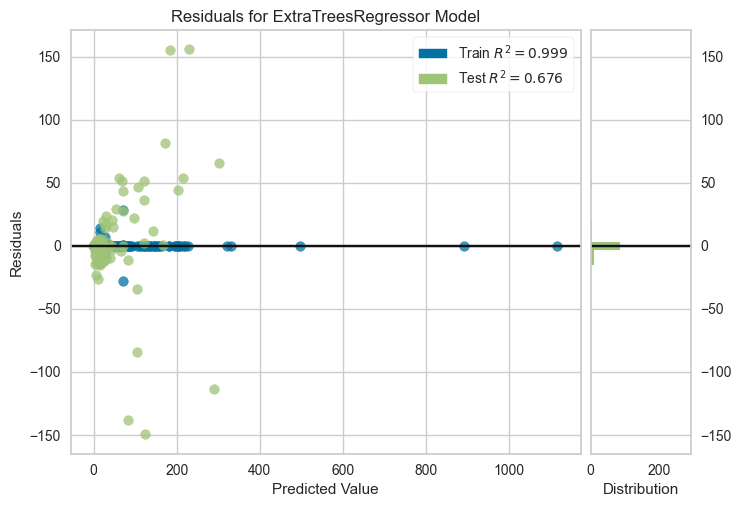

In [7]:
# plot residuals
plot_model(best, plot = 'residuals')


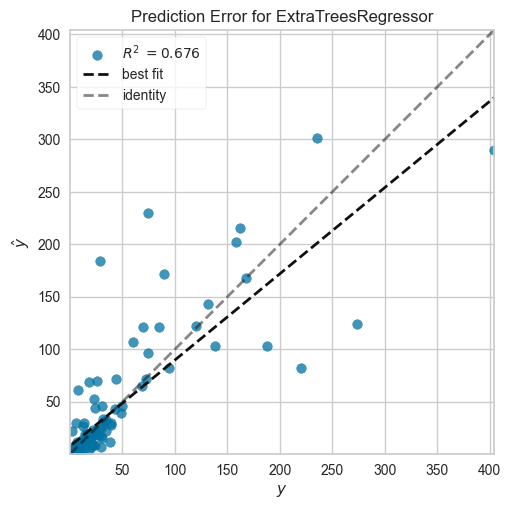

In [8]:
# plot error
plot_model(best, plot = 'error')

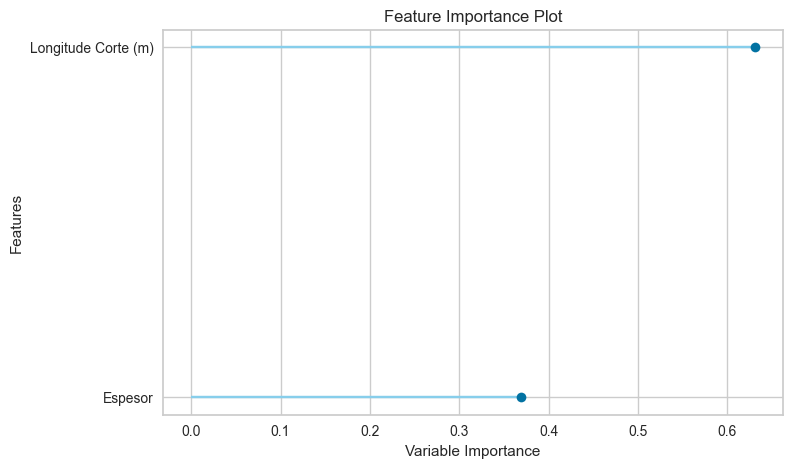

In [9]:
# plot feature importance
plot_model(best, plot = 'feature')


In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction

The predict_model function returns prediction_label as new column to the input dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.

In [11]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,13.5668,1051.4240,32.4257,0.6762,0.5271,0.5073


In [12]:
# show predictions df
holdout_pred

,Longitude Corte (m),Espesor,total_machining,prediction_label
48,17.799999,8,4.450000,4.951600
356,13.000000,20,18.000000,68.980003
85,60.542000,12,17.900000,19.062501
34,2.000000,4,0.560000,0.787300
11,456.429993,12,158.009995,202.453404
...,...,...,...,...
308,31.299999,3,6.000000,6.500000
171,33.032001,10,6.260000,11.713100
427,28.000000,6,18.000000,3.683200
182,22.042000,10,5.820000,10.065800


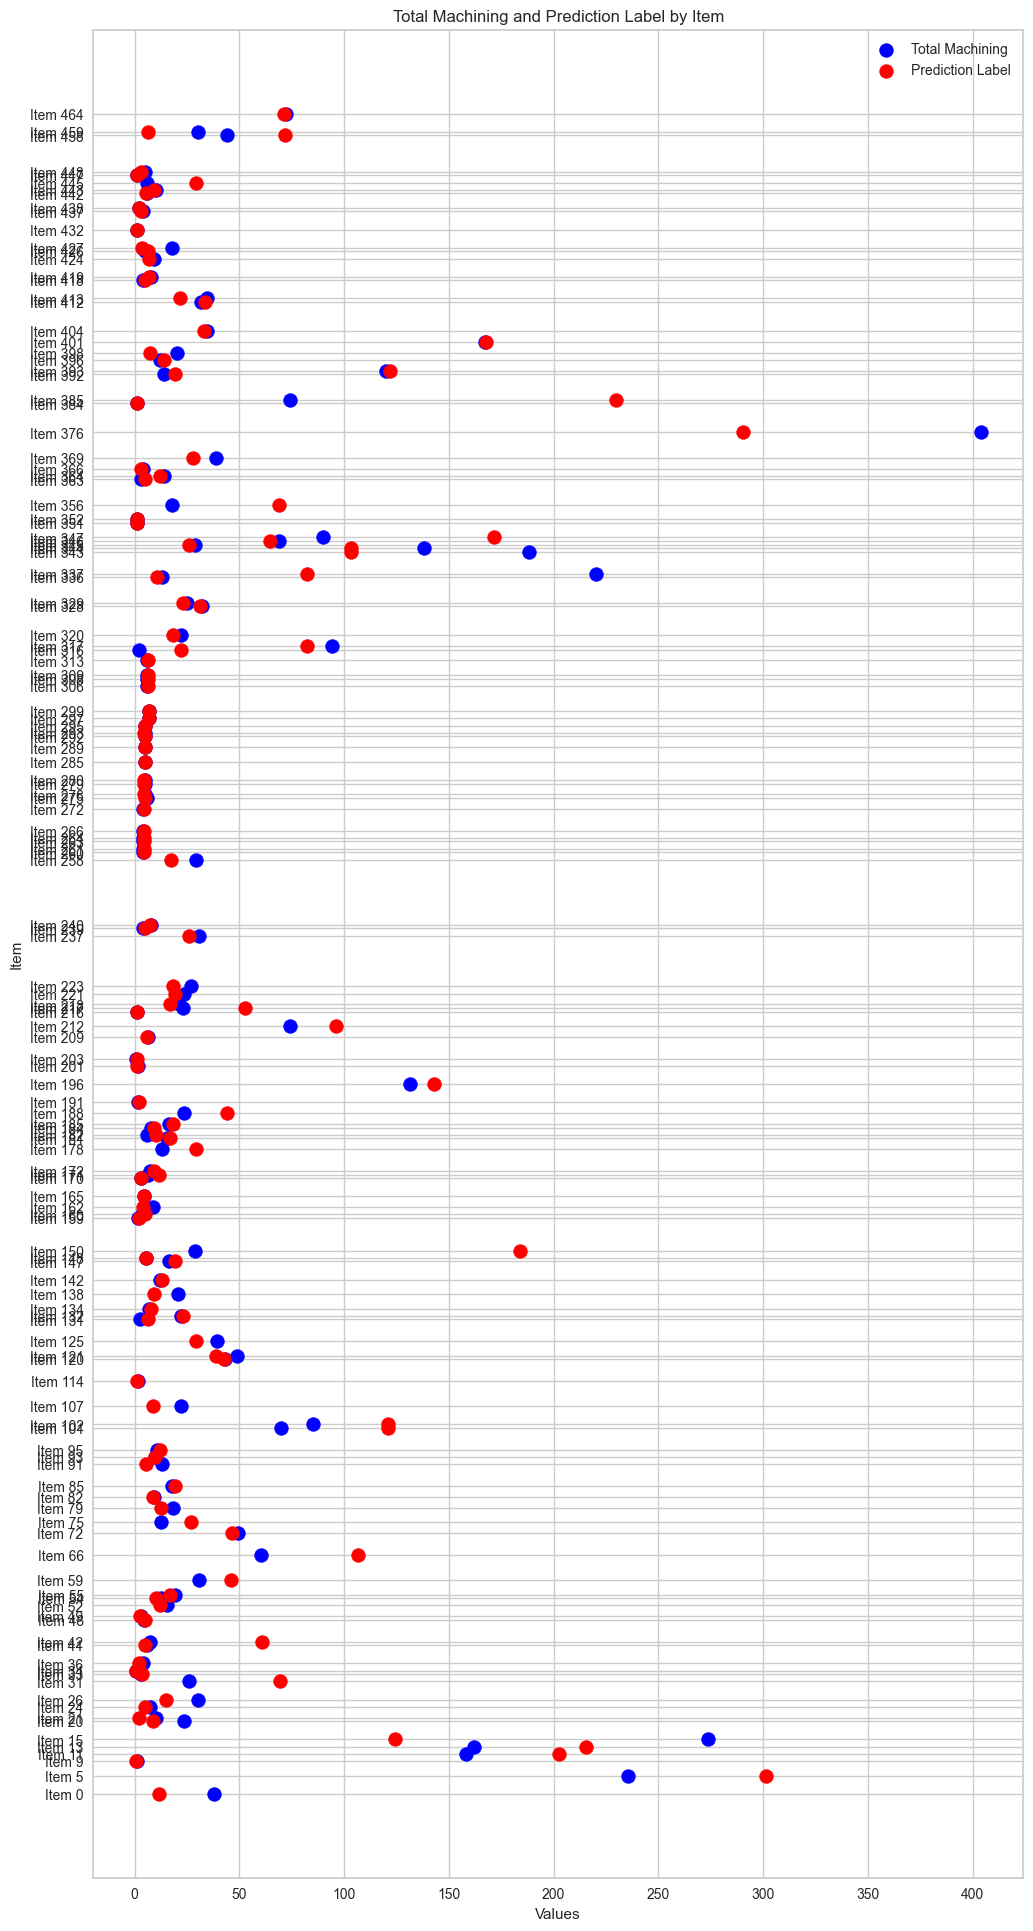

In [13]:
def plot_machining_and_prediction_swapped(df):
    """
        Plots items on the y-axis and 'total_machining' and 'prediction_label' on the x-axis with different colors.

        Parameters:
        df (pd.DataFrame): DataFrame containing the columns 'total_machining' and 'prediction_label'.

        Returns:
        None
        """
    plt.figure(figsize=(12, 24))

    # Plot total_machining with items on the y-axis
    plt.scatter(df['total_machining'], df.index, color='blue', label='Total Machining', s=100)

    # Plot prediction_label with items on the y-axis
    plt.scatter(df['prediction_label'], df.index, color='red', label='Prediction Label', s=100)

    # Adding titles and labels
    plt.title('Total Machining and Prediction Label by Item')
    plt.ylabel('Item')
    plt.xlabel('Values')
    plt.yticks(df.index, [f'Item {i}' for i in df.index])
    plt.legend()
    plt.grid(True)
    plt.show()


plot_machining_and_prediction_swapped(holdout_pred)

In [15]:

# Construct the path to the Excel file relative to the project root
file_path_model = os.path.join(project_root, 'models', 'laser_pycaret_pipeline')
save_model(best, file_path_model)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Longitude Corte (m)', 'Espesor'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 '/Users/joserubio/Desktop/proyectos/Kupfer/ML/laser/pycaret/Laser/models/laser_pycaret_pipeline.pkl')

In [16]:
file_path_model

'/Users/joserubio/Desktop/proyectos/Kupfer/ML/laser/pycaret/Laser/models/laser_pycaret_pipeline'

In [17]:
# load pipeline
loaded_best_pipeline = load_model(file_path_model)
loaded_best_pipeline


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/63/pdpj979n6t52hdkf9h7460_h0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Longitude Corte (m)', 'Espesor'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [18]:
# Create a DataFrame with a single row of test data

single_row = pd.DataFrame({
    'Longitude Corte (m)': [207],
    'Espesor': [32]
})

In [19]:
# Make predictions
prediction = predict_model(loaded_best_pipeline, data=single_row)

# Display the prediction
print(prediction)

   Longitude Corte (m)  Espesor  prediction_label
0                  207       32          285.2208


In [20]:
# tune hyperparameters of dt
tuned_dt = tune_model(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:11:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.7893,1164.5909,34.1261,0.7856,1.1862,4.4366
1,12.8570,216.3960,14.7104,0.9452,1.0936,3.3727
2,15.2665,439.6797,20.9685,0.7436,0.8931,2.0645
3,18.5271,774.2119,27.8247,0.6205,1.1571,3.7517
4,35.3511,17720.4699,133.1183,0.5178,0.8035,1.3803
5,15.8075,583.8812,24.1636,0.6456,1.0028,3.7615
6,15.1994,663.6305,25.7610,0.9254,0.7821,1.8288
7,17.1853,978.9493,31.2882,0.4879,1.1469,3.1451
8,42.3819,12424.7546,111.4664,0.5113,1.0754,2.8081


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

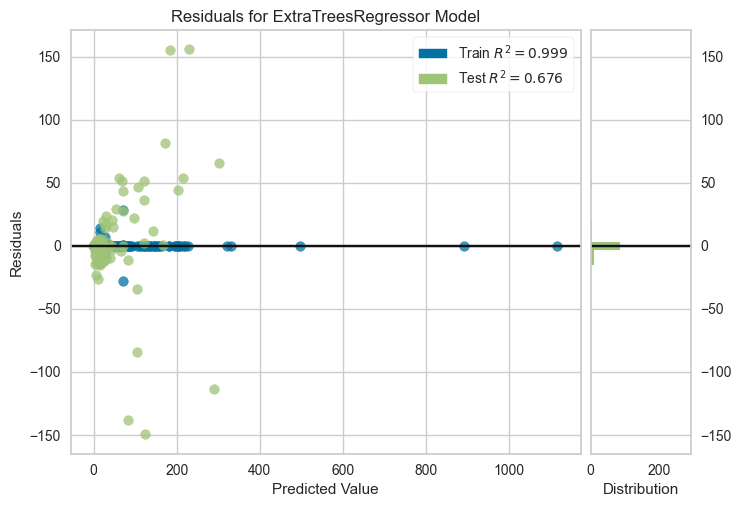

In [22]:
# functional API
plot_model(best, plot = 'residuals')

In [23]:
# create app
# create_app(best)

In [24]:

create_docker('lr_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [27]:
# %load requirements.txt

pycaret
fastapi
uvicorn
pydantic<2.0.0. # required for airflow



In [28]:
# %load dockerfile


FROM python:3.8-slim

WORKDIR /app

ADD . /app

RUN apt-get update     && apt-get install -y libgomp1     && apt-get clean

RUN pip install -r requirements.txt

EXPOSE 8000

CMD ["uvicorn", "lr_api:app", "--host", "0.0.0.0", "--port", "8000"]

